In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

# Explore the data
df.info()
df.head()


<ipython-input-3-4a0713028e3f>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


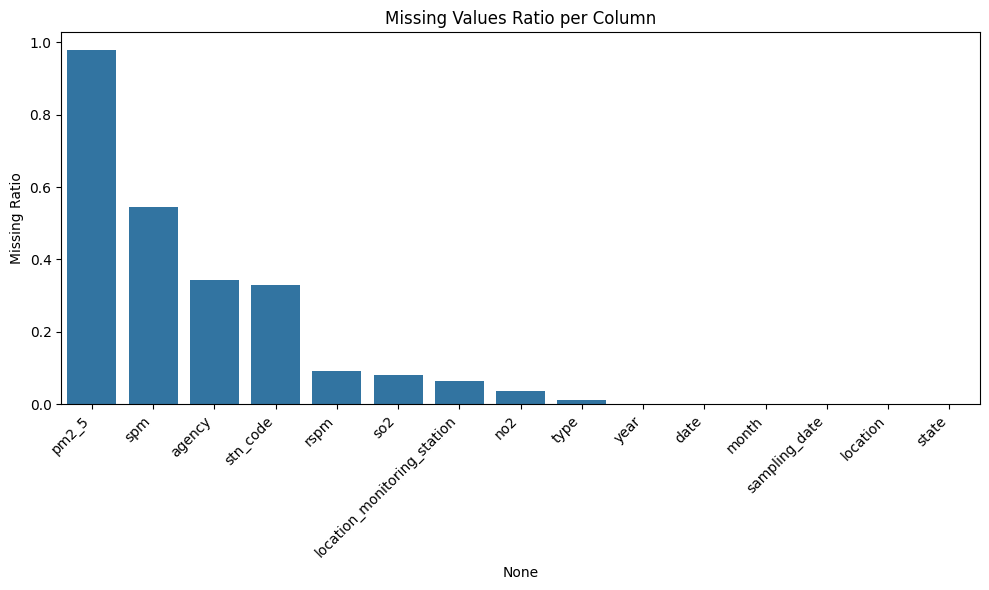

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values Ratio per Column')
plt.ylabel('Missing Ratio')
plt.tight_layout()
plt.show()


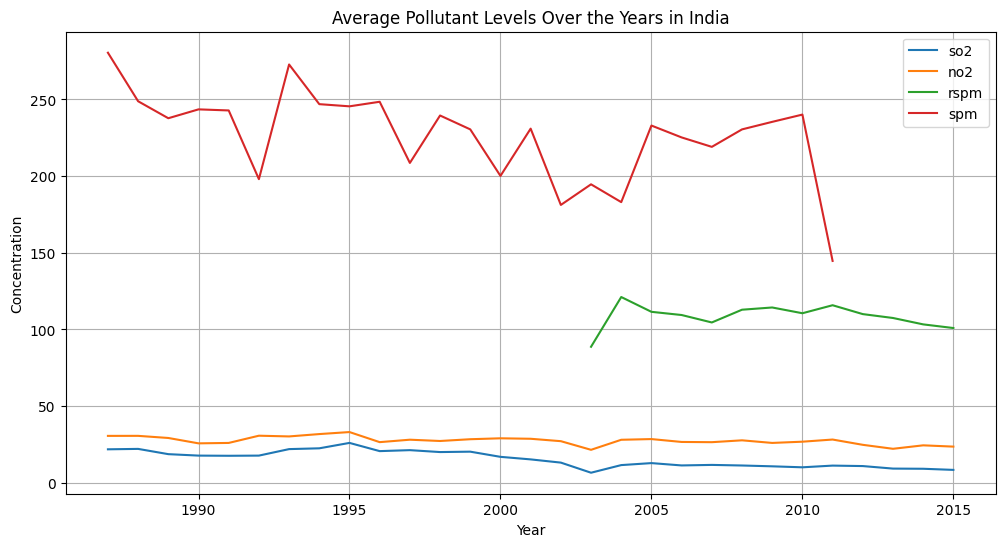

In [6]:
pollutants = ['so2', 'no2', 'rspm', 'spm']
yearly_avg = df.groupby('year')[pollutants].mean().reset_index()

plt.figure(figsize=(12, 6))
for col in pollutants:
    plt.plot(yearly_avg['year'], yearly_avg[col], label=col)
plt.title('Average Pollutant Levels Over the Years in India')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()


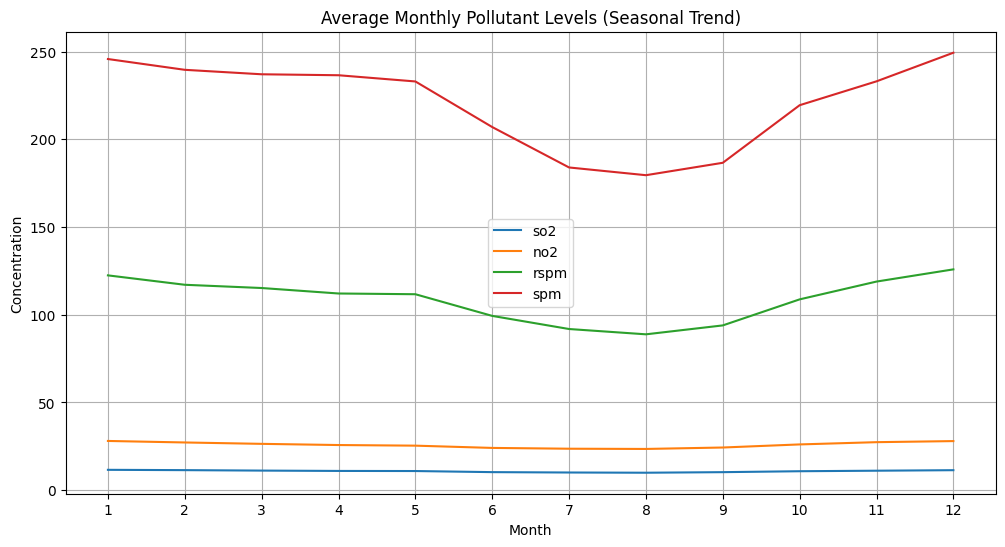

In [7]:
monthly_avg = df.groupby('month')[pollutants].mean().reset_index()

plt.figure(figsize=(12, 6))
for col in pollutants:
    plt.plot(monthly_avg['month'], monthly_avg[col], label=col)
plt.title('Average Monthly Pollutant Levels (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()


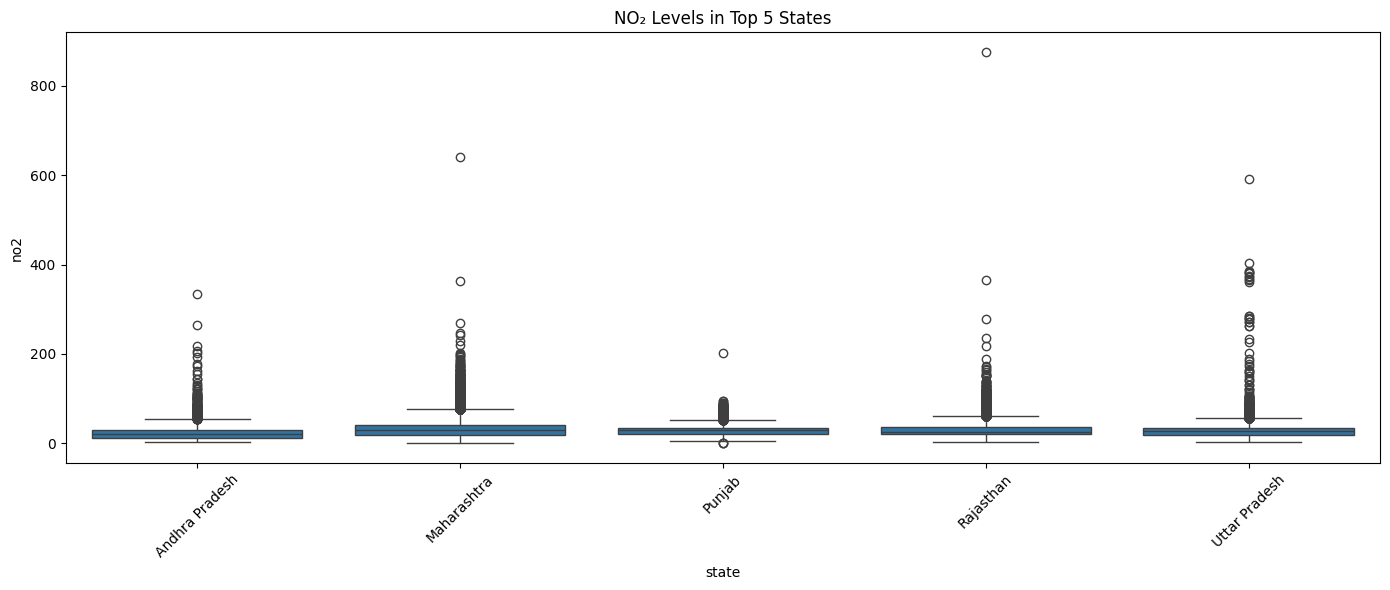

In [8]:
top_states = df['state'].value_counts().nlargest(5).index
regional_data = df[df['state'].isin(top_states)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=regional_data, x='state', y='no2')
plt.title('NO₂ Levels in Top 5 States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
